In [5]:
import cv2
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, GlobalMaxPool2D

In [2]:

import cv2
img = cv2.imread("CALTECH_51458.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img.shape


(480, 640, 3)

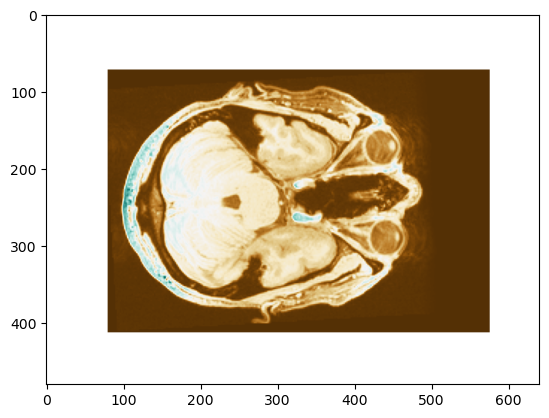

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img)

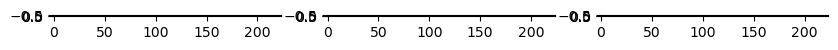

In [7]:
# R, G, B channels plots
plt.figure(figsize = (10,8))
for i in range(3):
  ax = plt.subplot(1,3, i+1)
  # ax.set_xticks([])
  # ax.set_yticks([])
  plt.imshow(img[:,:,i]) # cmap = "gray"
plt.show()

In [5]:
import numpy as np
# from google.colab.patches import cv2_imshow
img = cv2.resize(img,(224,224))
img.shape

(224, 224, 3)

In [6]:
import numpy as np
img = np.expand_dims(img,axis = 0)
img.shape

(1, 224, 224, 3)

## Feature Extraction using CNN

In [1]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, GlobalMaxPool2D
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Conv2D(30,kernel_size = (3,3),input_shape = (224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(25,kernel_size = (3,3)))
model.add(MaxPool2D())
model.add(Conv2D(15,kernel_size = (3,3)))
model.add(MaxPool2D())
model.add(Conv2D(10,kernel_size = (3,3)))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(100,activation = "relu"))
model.add(Dense(20,activation = "relu"))
model.summary()

# features = model.predict([img])
# print(features.shape)

C:\Users\chand\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 30)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 25)      6775      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 25)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 15)        3390      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 15)        0

In [3]:
import os

In [31]:

# Load and preprocess images
image_folder = 'data'
images = []
i_path = []
for filename in os.listdir(image_folder):
    img_path = os.path.join(image_folder, filename)
    img = load_img(img_path, target_size=(224, 224))  # Resize to match VGG16 input size
    img = img_to_array(img)
    img = preprocess_input(img)
    images.append(img)
    i_path.append(img_path)

images = tf.convert_to_tensor(images)

# Extract features
features = model.predict(images)
flatten_features = features.reshape(features.shape[0], -1)

# Create a DataFrame
feature_df = pd.DataFrame(flatten_features)
image_df = pd.DataFrame(i_path)
image_df.columns = ["path"]
df = pd.concat([feature_df,image_df],axis = 1)
# Save the DataFrame to a CSV file
csv_file_path = 'cnn.csv'
df.to_csv(csv_file_path, index=False)

print("Features saved to", csv_file_path)

35/35 [==============================] - 11s 323ms/step
Features saved to cnn.csv


In [32]:
D = []
for i in df['path']:
    D.append(int(i.split("_")[-1].split(".")[0]))
df['num'] = D
df = df.sort_values("num")
df.reset_index(drop = True,inplace=True)
df.drop("path",inplace=True,axis = 1)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,num
0,104.062103,0.000000,23.455921,0.0,5.204247,24.853136,0.000000,41.203320,58.086590,0.0,...,0.000000,0.000000,0.000000,9.619616,0.000000,0.0,0.0,0.0,20.072935,50002
1,96.491508,8.104513,54.768200,0.0,30.281000,41.698238,0.000000,20.659409,39.735836,0.0,...,0.000000,0.000000,0.000000,25.919405,0.000000,0.0,0.0,0.0,30.978947,50003
2,102.274170,5.105470,40.471798,0.0,0.000000,47.995499,0.000000,41.455029,67.019585,0.0,...,0.000000,0.000000,0.000000,39.796459,14.500037,0.0,0.0,0.0,8.541305,50004
3,92.373199,0.000000,46.064396,0.0,3.833003,57.650028,0.000000,45.204327,59.195969,0.0,...,0.000000,0.664960,0.000000,27.255911,0.000000,0.0,0.0,0.0,24.828148,50005
4,112.321411,2.775308,64.145935,0.0,15.373730,70.035942,0.000000,24.179323,35.479576,0.0,...,0.000000,0.000000,0.000000,18.825218,0.000000,0.0,0.0,0.0,25.907555,50006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,73.338158,0.000000,56.925438,0.0,0.000000,86.210663,39.819542,71.961113,66.439735,0.0,...,17.944239,0.000000,0.000000,16.753059,7.270754,0.0,0.0,0.0,32.882633,51583
1096,83.725662,0.000000,68.051094,0.0,0.000000,78.587616,35.824749,76.725365,72.605721,0.0,...,0.817614,0.000000,0.000000,34.604168,0.919924,0.0,0.0,0.0,3.936666,51584
1097,76.699020,0.000000,73.506958,0.0,0.000000,88.879532,45.644279,46.472919,47.672691,0.0,...,15.564301,0.000000,0.000000,20.632444,0.000000,0.0,0.0,0.0,43.357754,51585
1098,120.729340,0.000000,40.934048,0.0,0.000000,2.265223,0.000000,95.974762,89.015289,0.0,...,0.000000,30.646441,34.421028,8.249773,0.000000,0.0,0.0,0.0,29.141554,51606


In [18]:
import pandas as pd
m=num = []
df = pd.read_csv("cnn20.csv")
for i in df['File']:
    num.append(i.split("_")[-1])
df['File']  = num
df.to_csv('cnn20.csv')

## Feature Extraction using Resnet

In [24]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, GlobalMaxPool2D

model = ResNet50(weights = "imagenet", include_top = False, input_shape = (224,224,3))
model.trainable = False

# model.summary()
import tensorflow , keras
modelR = tensorflow.keras.Sequential([
    model,
    GlobalMaxPool2D(),
    Dense(128, activation='relu'),  # Add a dense layer with 128 units and ReLU activation
    Dense(20, activation='softmax')
    # MaxPool2D(),
    # Conv2D(35,kernel_size = (3,3)),
    # GlobalMaxPool2D()
])

# Load and preprocess images
image_folder = 'data'
images = []
i_path = []
for filename in os.listdir(image_folder):
    img_path = os.path.join(image_folder, filename)
    img = load_img(img_path, target_size=(224, 224))  # Resize to match VGG16 input size
    img = img_to_array(img)
    img = preprocess_input(img)
    images.append(img)
    i_path.append(img_path)

images = tf.convert_to_tensor(images)

# Extract features
features = modelR.predict(images)
flatten_features = features.reshape(features.shape[0], -1)

# Create a DataFrame
feature_df = pd.DataFrame(flatten_features)
image_df = pd.DataFrame(i_path)
df = pd.concat([feature_df,image_df],axis = 1)
# Save the DataFrame to a CSV file
csv_file_path = 'resnet20.csv'
df.to_csv(csv_file_path, index=False)

print("Features saved to", csv_file_path)

35/35 [==============================] - 111s 3s/step
Features saved to resnet20.csv


In [26]:
import pandas as pd
m=num = []
df = pd.read_csv("resnet20.csv")
for i in df['File']:
    num.append(i.split("_")[-1])
df['File']  = num
df.to_csv('resnet20.csv')

## Feature Extraction using VGG16

In [7]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, GlobalMaxPool2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50,VGG16
import os
model = VGG16(weights = "imagenet", include_top = False, input_shape = (224,224,3))
model.trainable = False

# model.summary()
import tensorflow , keras
modelR = tensorflow.keras.Sequential([
    model,
    GlobalMaxPool2D(),
    Dense(128, activation='relu'), 
    Dense(256, activation='relu'),# Add a dense layer with 128 units and ReLU activation
    Dense(20, activation='softmax')
    # GlobalMaxPool2D()
])

# Load and preprocess images
image_folder = 'data'
images = []
i_path = []
for filename in os.listdir(image_folder):
    img_path = os.path.join(image_folder, filename)
    img = load_img(img_path, target_size=(224, 224))  # Resize to match VGG16 input size
    img = img_to_array(img)
    img = preprocess_input(img)
    images.append(img)
    i_path.append(img_path)

images = tf.convert_to_tensor(images)

# Extract features
features = modelR.predict(images)
flatten_features = features.reshape(features.shape[0], -1)

# Create a DataFrame
feature_df = pd.DataFrame(flatten_features)
image_df = pd.DataFrame(i_path)
df = pd.concat([feature_df,image_df],axis = 1)
# Save the DataFrame to a CSV file
csv_file_path = 'Vgg20.csv'
df.to_csv(csv_file_path, index=False)

print("Features saved to", csv_file_path)


35/35 [==============================] - 153s 4s/step
Features saved to Vgg20.csv


In [8]:
import pandas as pd
m=num = []
df = pd.read_csv("vgg20.csv")
for i in df['File']:
    num.append(i.split("_")[-1])
df['File']  = num
df.to_csv('vgg20.csv')

In [1]:
import pandas as pd

In [2]:
cnn=pd.read_csv(r'cnn20.csv')

In [3]:
cnn.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
resnet=pd.read_csv(r'resnet20.csv')

In [5]:
resnet.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
vgg=pd.read_csv(r'vgg20.csv')

In [7]:
vgg.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
cnn.shape,resnet.shape,vgg.shape

((1100, 21), (1100, 21), (1100, 21))

In [9]:
image20=cnn+resnet+vgg

In [11]:
image20.to_csv('image20.csv')

In [ ]:
!wget https://www.rd.com/wp-content/uploads/2021/06/GettyImages-1205998407-e1624731290663.jpg


--2023-05-09 10:46:32--  https://www.rd.com/wp-content/uploads/2021/06/GettyImages-1205998407-e1624731290663.jpg
Resolving www.rd.com (www.rd.com)... 104.18.11.164, 104.18.10.164, 2606:4700::6812:aa4, ...
Connecting to www.rd.com (www.rd.com)|104.18.11.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341355 (333K) [image/jpeg]
Saving to: ‘GettyImages-1205998407-e1624731290663.jpg’

GettyImages-1205998 100%[===================>] 333.35K  --.-KB/s    in 0.005s  

2023-05-09 10:46:32 (60.6 MB/s) - ‘GettyImages-1205998407-e1624731290663.jpg’ saved [341355/341355]



In [7]:
import pandas as pd
m=num = []
df = pd.read_csv("dense10.csv")
for i in df['File']:
    num.append(i.split("_")[-1])
df['File']  = num
df.to_csv('imagedense10.csv')

In [8]:
data=pd.read_csv(r'data.csv')

In [16]:
image_data=pd.read_csv(r'imagedense10.csv')

In [17]:
image_data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,subject
0,0,0.999869,2.480000e-14,2.890000e-13,1.710000e-12,1.025400e-04,0.000028,4.100000e-09,6.240000e-07,3.720000e-07,7.260000e-11,51456
1,1,0.026513,2.440000e-13,3.930000e-07,1.400000e-08,2.873339e-02,0.943888,2.710000e-08,7.889220e-04,7.630000e-05,1.100000e-07,51457
2,2,0.998492,2.090000e-13,5.350000e-10,7.900000e-12,1.678120e-04,0.000892,2.520000e-10,1.340000e-06,4.467210e-04,2.010000e-07,51458
3,3,0.000004,1.560000e-16,1.790000e-11,3.490000e-14,3.230000e-05,0.999964,3.910000e-14,1.020000e-09,4.600000e-10,1.350000e-09,51459
4,4,0.987828,3.800000e-14,6.180000e-09,3.550000e-13,8.463380e-04,0.011264,5.910000e-10,3.850000e-07,6.180000e-05,2.380000e-09,51460
...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1097,0.000110,1.840000e-13,9.410000e-09,2.480000e-10,2.600000e-06,0.999887,4.550000e-14,9.710000e-11,3.660000e-09,1.780000e-08,50624
1098,1098,0.001091,1.160000e-10,9.200000e-07,8.170000e-08,1.062870e-04,0.998798,1.230000e-13,5.360000e-10,3.290000e-06,1.270000e-08,50625
1099,1099,0.002108,1.090000e-09,1.790000e-06,2.480000e-08,3.192268e-03,0.994698,4.690000e-11,9.450000e-10,9.130000e-08,1.610000e-07,50626
1100,1100,0.032701,2.680000e-10,2.580000e-05,2.660000e-08,7.715270e-04,0.966499,1.270000e-10,3.100000e-07,1.610000e-06,8.510000e-08,50627


In [18]:
data.shape,image_data.shape

((1100, 29), (1102, 12))

In [19]:
data['subject']

0       50002
1       50003
2       50004
3       50005
4       50006
        ...  
1095    51583
1096    51584
1097    51585
1098    51606
1099    51607
Name: subject, Length: 1100, dtype: int64

In [20]:
# image_data.columns.rename({"SUBID":"subject"},inplace = True)
image_data.rename(columns = {"SUBID":"subject"}, inplace = True)

In [21]:
new=pd.merge(data, image_data, on='subject', how='inner')

In [22]:
new.shape

(1100, 40)

In [45]:
data.shape,image_data.shape

((1100, 29), (1102, 2050))

In [23]:
new.to_csv('mergeddense10.csv')